# Explore

In [1]:
# Import necessary libraries for data manipulation and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the 'nltk.sentiment' module
# using the Natural Language Toolkit (NLTK). Ensure NLTK is installed and configured properly.
import nltk.sentiment

# Import 'wrangle' for data wrangling operations later in the code.
import wrangle

**Prep data**

In [2]:
# get data using the wrangle_glassdoor function
original_df, unicountvect,bicount_vect,tricount_vect = wrangle.wrangle_glassdoor()

In [3]:
# separate the origianal data in train validate and test for data exploration on train
train, val, test = original_df
train.head()

,pros,cons,name,rating,ceo_approval,friend_recommendation,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
url,,,,,,,,,,,,
https://www.glassdoor.com/Reviews/Alight-Solutions-Reviews-E1729719.htm,Company values you as an employee\nAlight is b...,High call volume sometimes during busy season\...,Alight Solutions,3.5,71.0,64.0,company values you as an employee\nalight is b...,company value employee alight far great compan...,high call volume sometimes during busy season\...,high call volume sometimes busy season larger ...,Three,3
https://www.glassdoor.com/Reviews/eBay-Reviews-E7853.htm,I never expected working at a large company to...,I haven't found any cons yet!\nAlthough the in...,eBay,4.1,84.0,80.0,i never expected working at a large company to...,never expected working large company like ever...,i haven ' t found any cons yet\nalthough the i...,' found con yet although initiative really foc...,Four,4
https://www.glassdoor.com/Reviews/Trane-Technologies-Reviews-E349.htm,"- Company is socially-minded and progressive, ...","- A few people are the over-promise, under-del...",Trane Technologies,3.9,81.0,75.0,company is sociallyminded and progressive whic...,company sociallyminded progressive make feel g...,a few people are the overpromise underdeliver ...,people overpromise underdeliver type thats unc...,Three,3
https://www.glassdoor.com/Reviews/Lenovo-Reviews-E8034.htm,"Awesome team, great job and experience.\nAs a ...",Can be subject to market volatility.\nFor thos...,Lenovo,4.0,91.0,78.0,awesome team great job and experience\nas a lo...,awesome team great job experience lower tier t...,can be subject to market volatility\nfor those...,subject market volatility north america workin...,Four,4
https://www.glassdoor.com/Reviews/SelfEmployed-com-Reviews-E5529631.htm,Make your own hours and fees\nFlexibility: You...,Business development is not my jam\nIncome Unc...,SelfEmployed.com,4.4,NaN,NaN,make your own hours and fees\nflexibility you ...,make hour fee flexibility freedom set schedule...,business development is not my jam\nincome unc...,business development jam income uncertainty in...,Four,4


In [7]:
# Star ratings
bin_labels = ["Three", "Four"]

## 1. Are there differences in word/words distribution between different binned star rating categories?

- Are there specific keywords that frequently appear in reviews associated with higher or lower star ratings?

In [23]:
# Filter the data for the current bin label from the 'train' dataset.
bin_data_one = train.cons_lemmatized[train.binned_rating == "Three"]
bin_data_two = train.cons_lemmatized[train.binned_rating == "Four"]

# Calculate word counts for the lemmatized 'pros' text within the current bin.
word_counts_one = pd.Series(" ".join(bin_data_one).split()).value_counts()
word_counts_two = pd.Series(" ".join(bin_data_two).split()).value_counts()

set_one = set(word_counts_one.head(20).index)
set_two = set(word_counts_two.head(20).index)
set_one - set_two

{'customer', 'day', 'low', 'make'}

### Pros

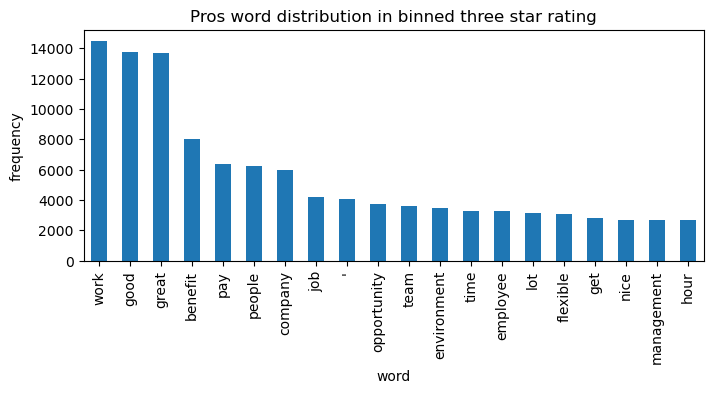

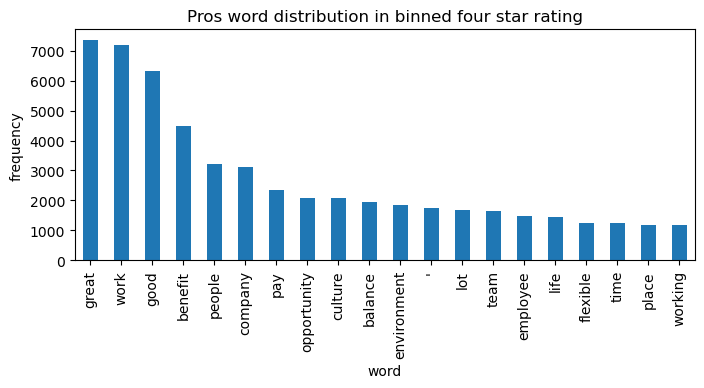

In [8]:
for i in bin_labels:
    # Create a new figure for each bin label with specific dimensions for plotting.
    plt.figure(figsize=(8, 3))
    
    # Filter the data for the current bin label from the 'train' dataset.
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    
    # Calculate word counts for the lemmatized 'pros' text within the current bin.
    word_counts = pd.Series(" ".join(bin_data).split()).value_counts()
    
    # Plot the top 20 most frequent words as a bar chart.
    word_counts.head(20).plot(kind="bar")
    
    # Set the title of the plot based on the current bin label.
    plt.title(f"Pros word distribution in binned {i.lower()} star rating")
    
    # Label the x-axis as 'word' and the y-axis as 'frequency'.
    plt.xlabel("word")
    plt.ylabel("frequency")
    
    # Display the current plot.
    plt.show()


### Cons

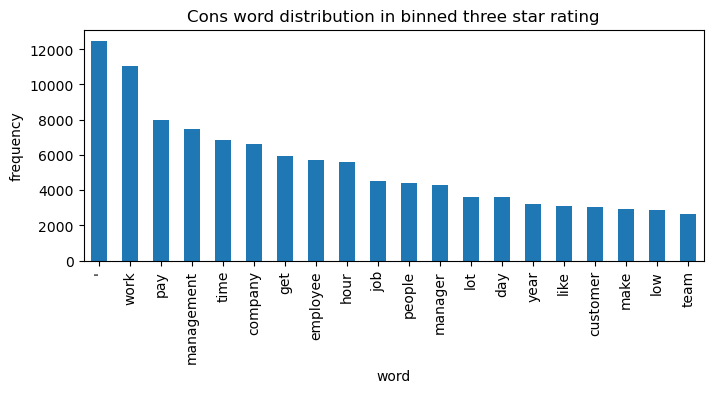

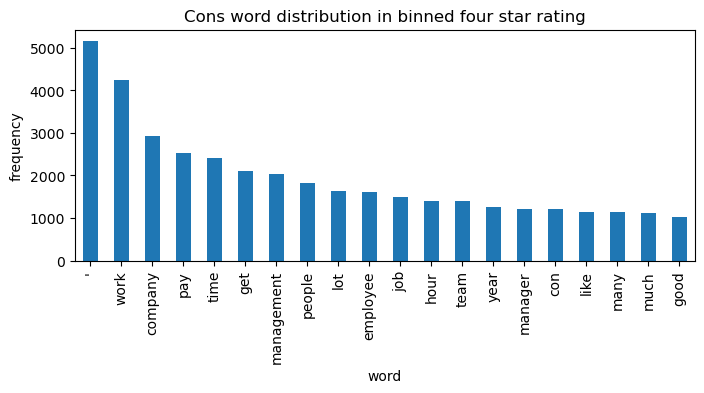

In [22]:
for i in bin_labels:
    # Create a new figure for each bin label with specific dimensions for plotting.
    plt.figure(figsize=(8, 3))
    
    # Filter the 'cons' text data for the current bin label from the 'train' dataset.
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    
    # Calculate word counts for the lemmatized 'cons' text within the current bin.
    word_counts = pd.Series(" ".join(bin_data).split()).value_counts()
    
    # Plot the top 20 most frequent words in the 'cons' text as a bar chart.
    word_counts.head(20).plot(kind="bar")
    
    # Set the title of the plot based on the current bin label.
    plt.title(f"Cons word distribution in binned {i.lower()} star rating")
    
    # Label the x-axis as 'word' and the y-axis as 'frequency'.
    plt.xlabel("word")
    plt.ylabel("frequency")
    
    # Display the current plot.
    plt.show()


## 2. Are reviews generally more positive in the pros section and more negative in the cons section, or is there a mix of sentiments?
- What are the most common positive themes mentioned in the pros reviews?
- What are the most common negative themes mentioned in the cons reviews?

### Pros

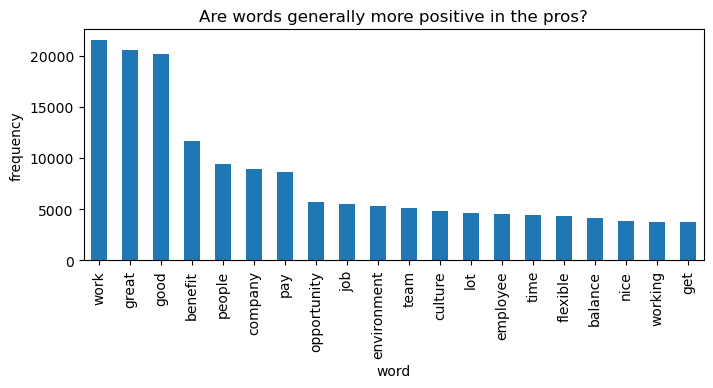

In [8]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

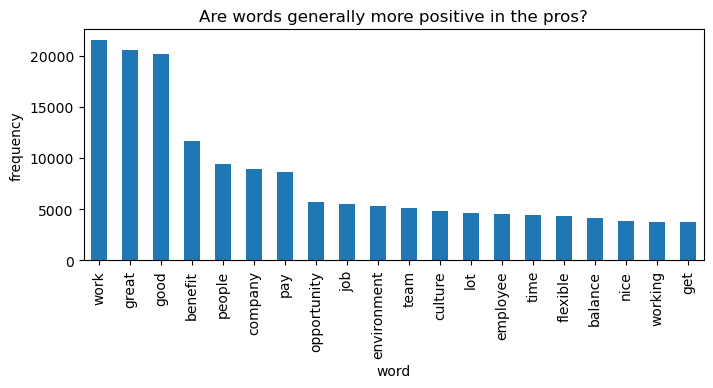

In [9]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons

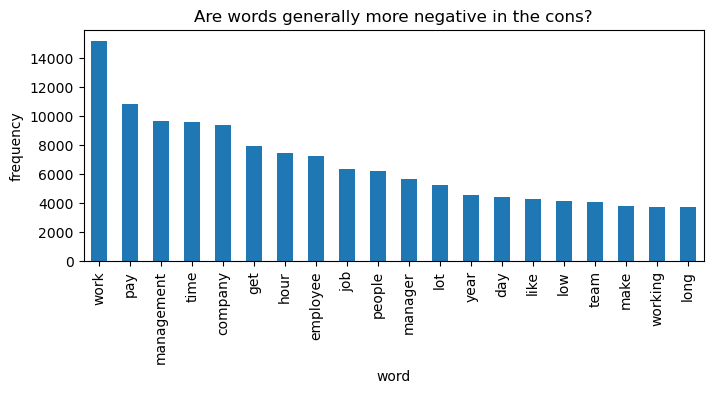

In [10]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.cons_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more negative in the cons?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

## 3. Do longer reviews have more impanct to the overall star rating compared to shorter reviews?

### Pros

In [11]:
# Define bin labels
bin_labels = ['Two', 'Three', "Four"]

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

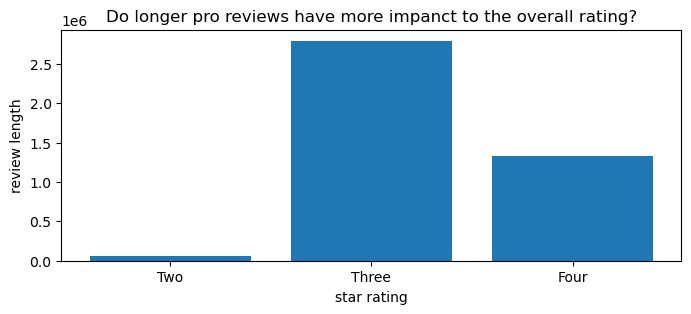

In [12]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer pro reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

### Cons

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

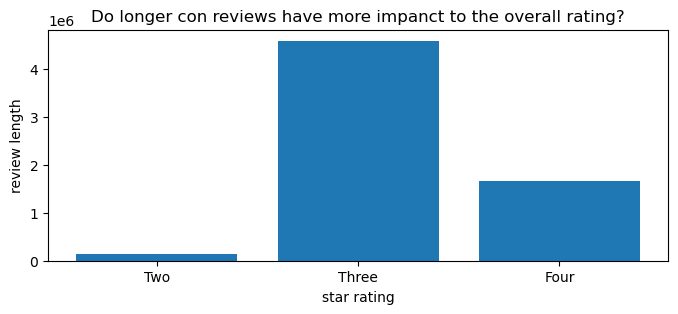

In [13]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer con reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

## 4. Are there instances where reviews express positive sentiments despite lower star ratings or vice versa?

In [14]:
# Define bin labels
low_bin_labels = ['Two', 'Three', "Four"]
high_bin_labels = ['Four']

### Low stars and positive sentiment (Combined pros and cons for each star)

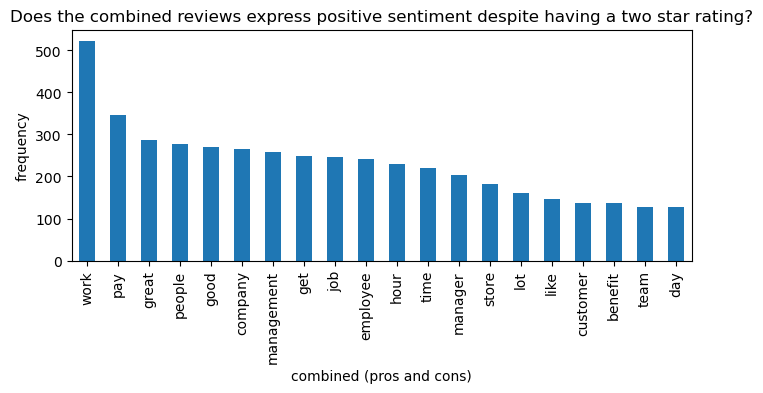

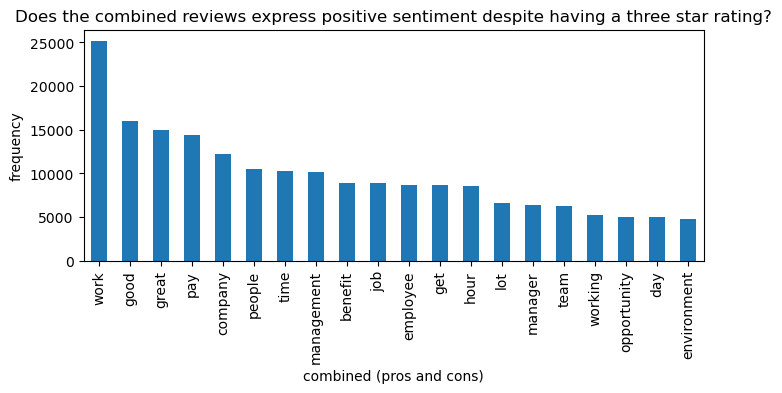

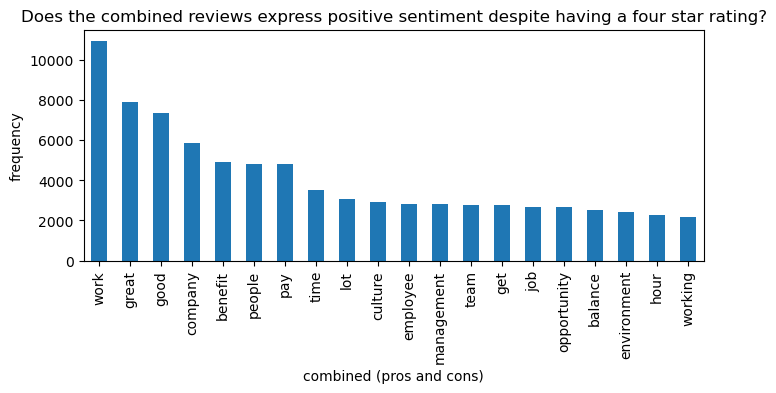

In [15]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Does the combined reviews express positive sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

### high stars and negative sentiment (Combined pros and cons for each star)

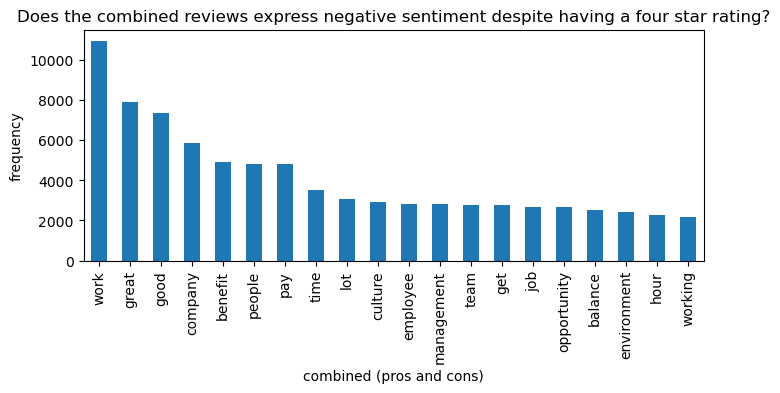

In [16]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating == i].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating == i].values)
    pros_cons = pros + " " + cons
    
    # Calculate word counts
    pd.Series(pros_cons.split()).value_counts().head(20).plot(kind="bar")
    plt.title(f"Does the combined reviews express negative sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

## 5. Are there any words that uniquely identify pros and cons?

In [17]:
# get the word frequencies for each category
pros_freq = pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts()
cons_freq = pd.Series(" ".join(train.cons_lemmatized.values).split()).value_counts()
pros_cons_str = " ".join(train.cons_lemmatized.values) + " ".join(train.pros_lemmatized.values)
all_freq = pd.Series(pros_cons_str.split()).value_counts()
all_freq

work             36685
good             23640
great            23128
pay              19495
company          18321
                 ...  
rollingrandom        1
multimethod          1
anythinghelp         1
polling              1
bffs                 1
Length: 31779, dtype: int64

In [18]:
# concat all frequencies together into a dataframe
word_freq= pd.concat([pros_freq, cons_freq, all_freq], axis=1).fillna(0).astype(int)
word_freq.columns = ['pros_freq', 'cons_freq', 'all_freq']

word_freq

,pros_freq,cons_freq,all_freq
work,21492,15193,36685
great,20579,2549,23128
good,20196,3444,23640
benefit,11614,2327,13941
people,9397,6179,15576
...,...,...,...
razor,0,1,1
supervisorsmanagersadministration,0,1,1
baffled,0,1,1
unrealstic,0,1,1


### Pros

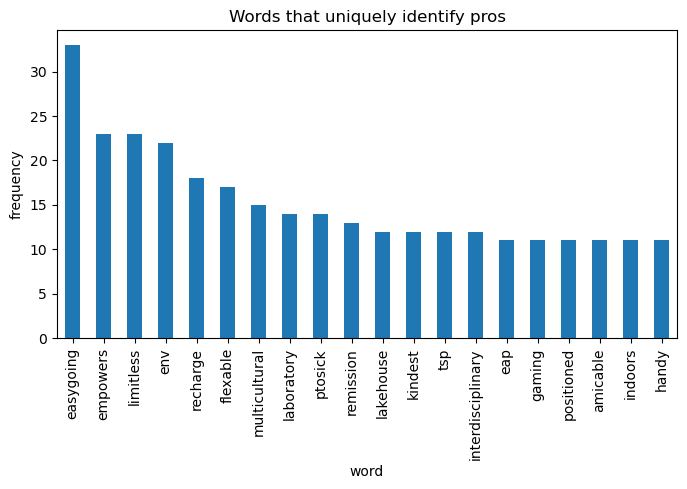

In [28]:
word_freq.pros_freq[word_freq.cons_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Words that uniquely identify pros")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons

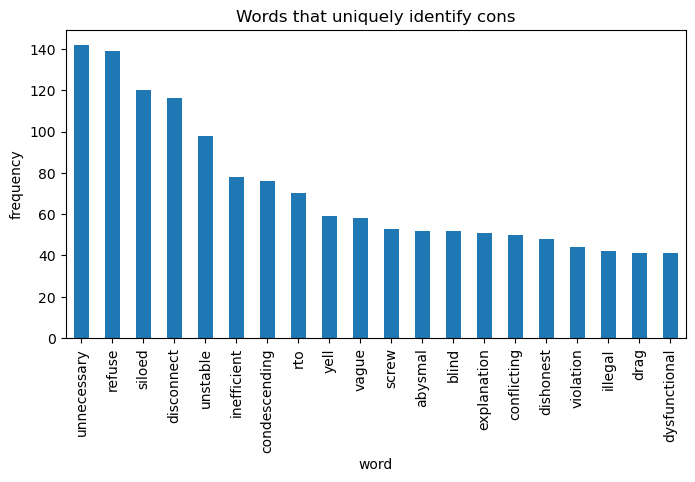

In [29]:
word_freq.cons_freq[word_freq.pros_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Words that uniquely identify cons")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### 6. What are the top words found in both pros and cons

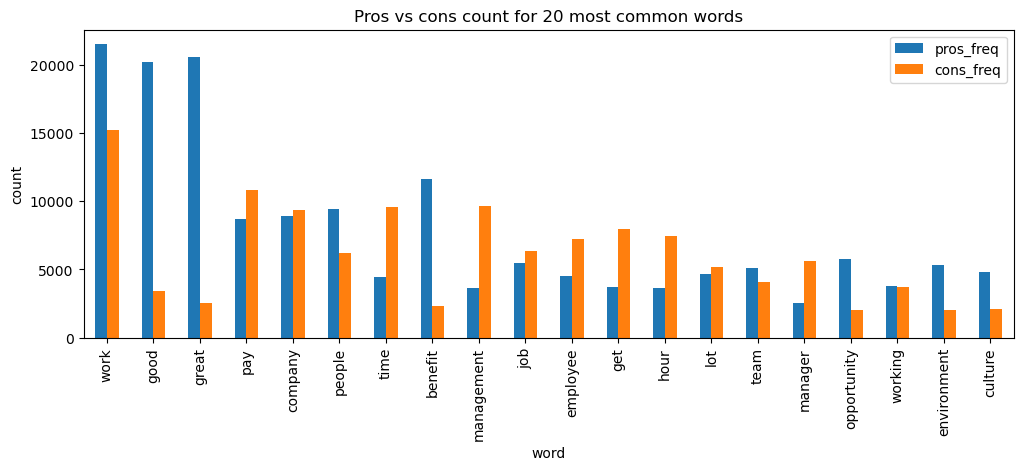

In [30]:
# plot most common words
word_freq.sort_values('all_freq', ascending=False)[['pros_freq', 'cons_freq']].head(20).plot(kind="bar", figsize=(12,4))
plt.title("Pros vs cons count for 20 most common words")
plt.xlabel("word")
plt.ylabel("count")
plt.show()

## 7. Identify the sentiment score for each company revies

In [31]:
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [32]:
# grab the sentiment from each of the texts as they stand:
# apply a lambda function on each cell in the text column:
# polarity_score's value associtated with the "compound"
# key for each score
train['pros_sentiment'] = train.pros_lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
train['cons_sentiment'] = train.cons_lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [33]:
train[["name","pros_lemmatized", "pros_lemmatized","pros_sentiment", "cons_sentiment"]].head()

,name,pros_lemmatized,pros_lemmatized,pros_sentiment,cons_sentiment
490,Perficient,perficient ethical company actually value empl...,perficient ethical company actually value empl...,1.0,0.9995
273,Farmers Insurance Group,company best ever large established company so...,company best ever large established company so...,1.0,0.9983
677,MIT,inspiring place work feel something new happen...,inspiring place work feel something new happen...,1.0,0.9892
406,Morningstar,coworkers amicable they're overall supportive ...,coworkers amicable they're overall supportive ...,1.0,0.9968
953,ICF,loved job people great flexibility fun project...,loved job people great flexibility fun project...,1.0,0.9992


### Pros

Text(0.5, 1.0, 'Pros sentiment distribution')

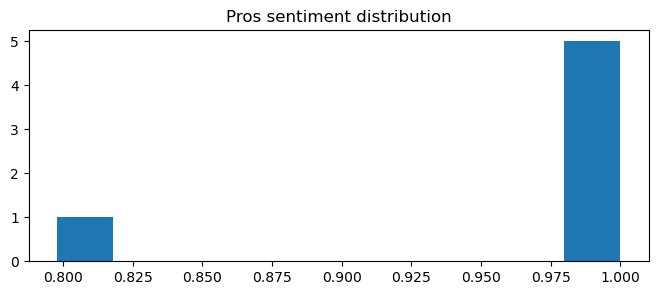

In [34]:
plt.figure(figsize=(8,3))
plt.hist(train.pros_sentiment.value_counts().index)
plt.title("Pros sentiment distribution")

### Cons

Text(0.5, 1.0, 'Pros sentiment distribution')

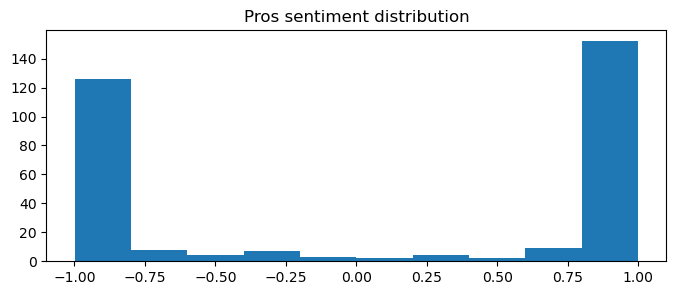

In [35]:
plt.figure(figsize=(8,3))
plt.hist(train.cons_sentiment.value_counts().index)
plt.title("Pros sentiment distribution")

## Take aways

- Nothing found in one star or 5 star

## With more time
- word count
- stopword count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio